In [2]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("heartdis.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.describe

<bound method NDFrame.describe of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0        

In [6]:
for c in df.columns:
  d=len(df[c].unique())
  print(f"{c}: {d} distinct values")

age: 41 distinct values
sex: 2 distinct values
cp: 4 distinct values
trestbps: 49 distinct values
chol: 152 distinct values
fbs: 2 distinct values
restecg: 3 distinct values
thalach: 91 distinct values
exang: 2 distinct values
oldpeak: 40 distinct values
slope: 3 distinct values
ca: 5 distinct values
thal: 4 distinct values
target: 2 distinct values


In [7]:
dupli = df[df.duplicated()]
print("No. of Duplicate Rows: ",dupli)

No. of Duplicate Rows:        age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15     34    0   1       118   210    0        1      192      0      0.7   
31     50    0   1       120   244    0        1      162      0      1.1   
43     46    1   0       120   249    0        0      144      0      0.8   
55     55    1   0       140   217    0        1      111      1      5.6   
61     66    0   2       146   278    0        0      152      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
15        2   0    

In [8]:
df=df.drop_duplicates()

Univariate Analysis


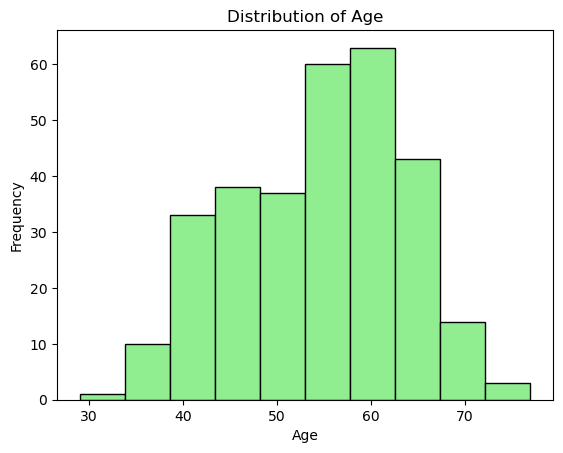

In [9]:
plt.hist(df['age'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

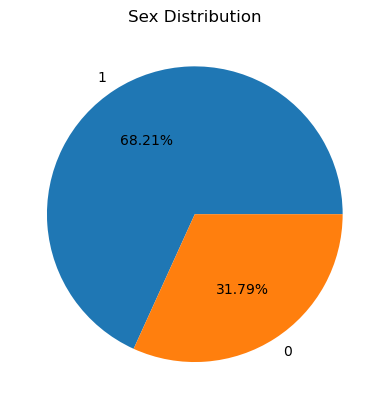

In [12]:
count_sex = df['sex'].value_counts()
plt.pie(count_sex, labels=count_sex.index, autopct='%2.2f%%')
plt.title('Sex Distribution')
plt.show()

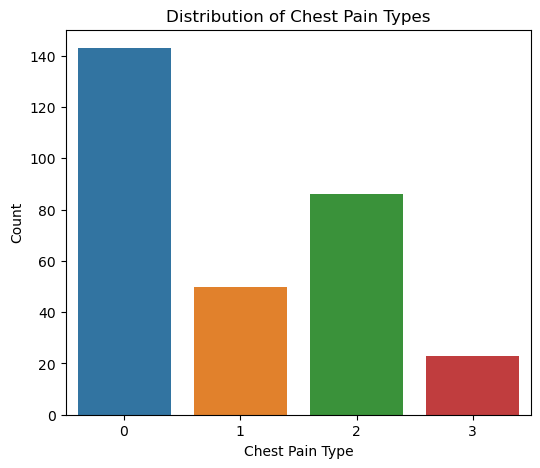

In [16]:
plt.figure(figsize=(6, 5))
sns.countplot(x='cp',data=df)
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

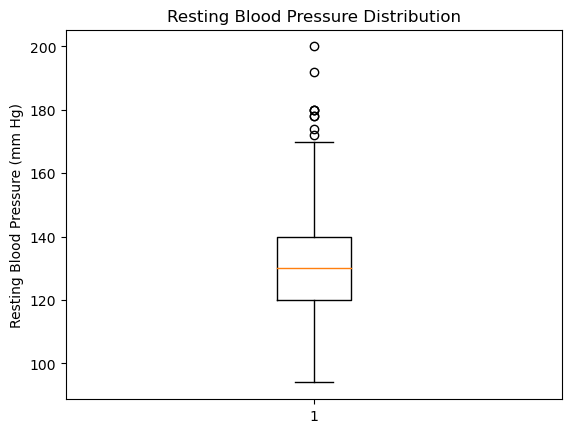

In [17]:
plt.boxplot(df['trestbps'])
plt.title('Resting Blood Pressure Distribution')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

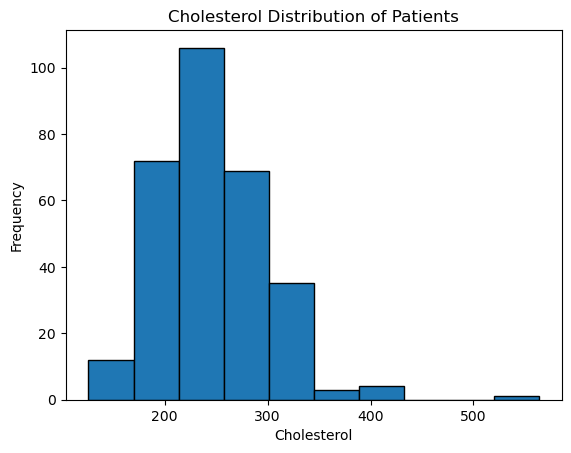

In [20]:
plt.hist(df['chol'],bins=10,edgecolor='black')
plt.title('Cholesterol Distribution of Patients')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

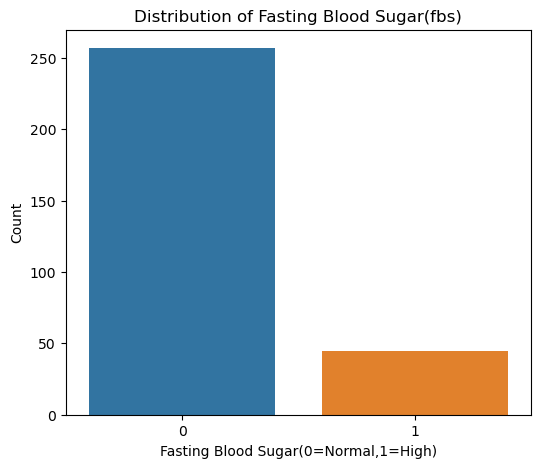

In [21]:
plt.figure(figsize=(6, 5))
sns.countplot(x='fbs',data=df)
plt.title('Distribution of Fasting Blood Sugar(fbs)')
plt.xlabel('Fasting Blood Sugar(0=Normal,1=High)')
plt.ylabel('Count')
plt.show()

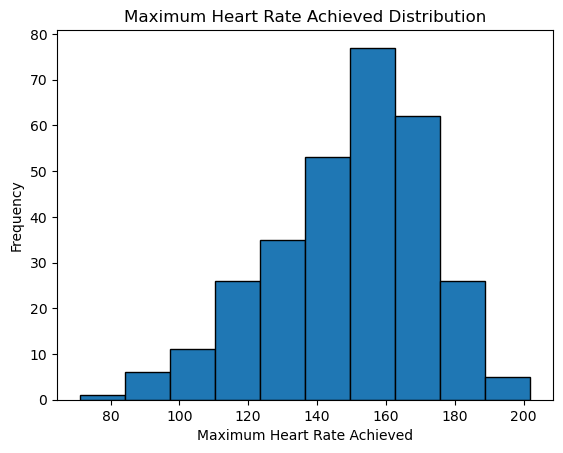

In [23]:
plt.hist(df['thalach'],bins=10,edgecolor='black')
plt.title('Maximum Heart Rate Achieved Distribution')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Frequency')
plt.show()

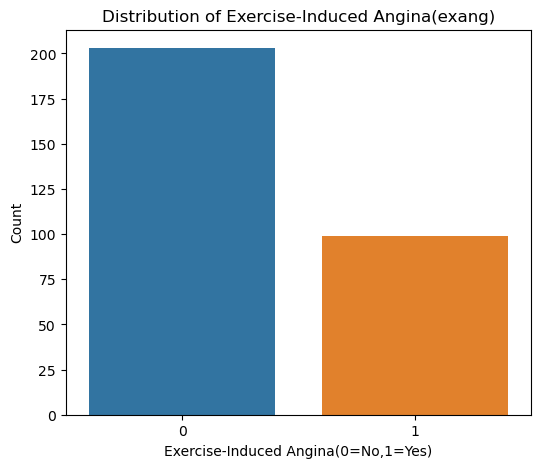

In [25]:
plt.figure(figsize=(6, 5))
sns.countplot(x='exang',data=df)
plt.title('Distribution of Exercise-Induced Angina(exang)')
plt.xlabel('Exercise-Induced Angina(0=No,1=Yes)')
plt.ylabel('Count')
plt.show()

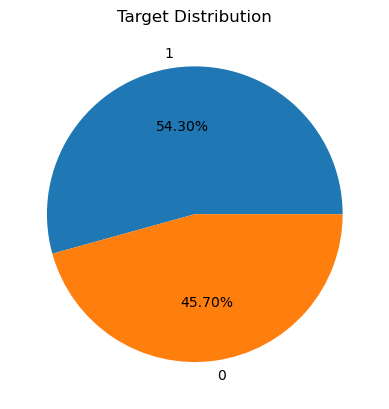

In [27]:
target_count = df['target'].value_counts()
plt.pie(target_count,labels=target_count.index,autopct='%2.2f%%')
plt.title('Target Distribution')
plt.show()

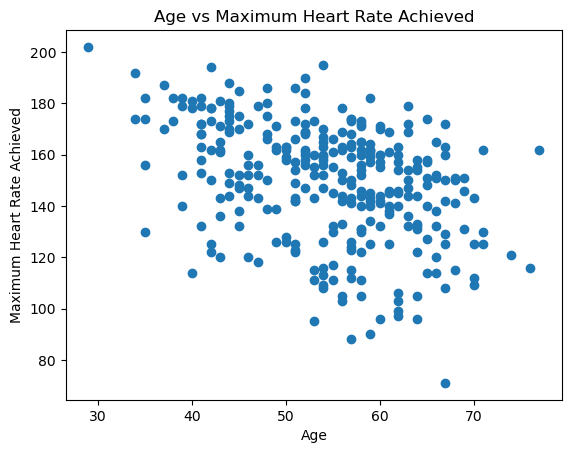

In [29]:
plt.scatter(df['age'],df['thalach'])
plt.title('Age vs Maximum Heart Rate Achieved')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

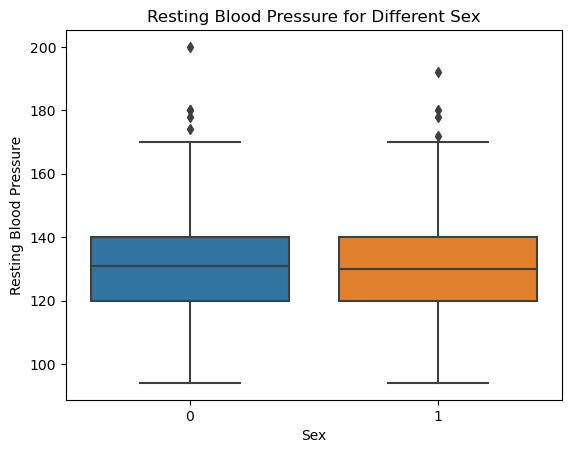

In [30]:
sns.boxplot(x='sex',y='trestbps',data=df)
plt.title('Resting Blood Pressure for Different Sex')
plt.xlabel('Sex')
plt.ylabel('Resting Blood Pressure')
plt.show()

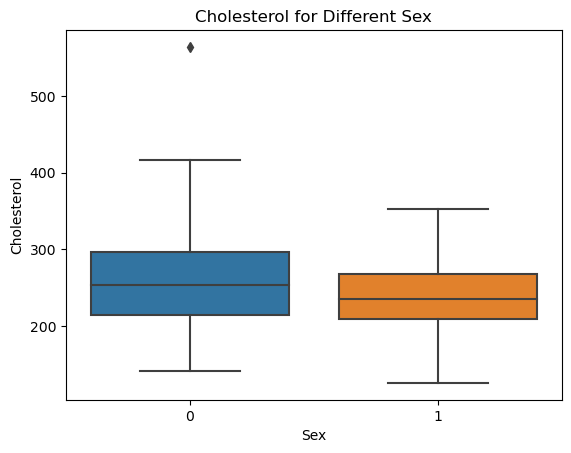

In [31]:
sns.boxplot(x='sex',y='chol',data=df)
plt.title('Cholesterol for Different Sex')
plt.xlabel('Sex')
plt.ylabel('Cholesterol')
plt.show()

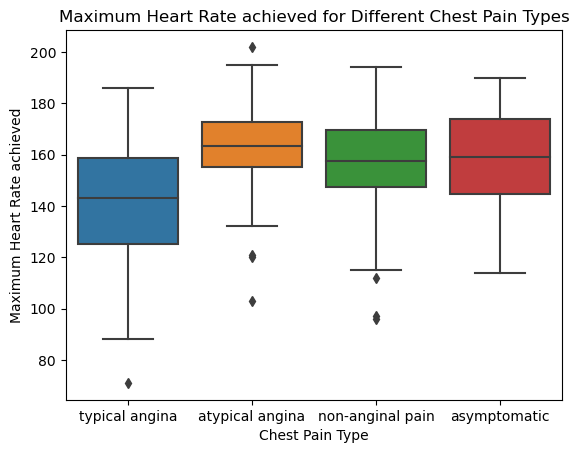

In [32]:
sns.boxplot(x='cp',y='thalach',data=df)
plt.title('Maximum Heart Rate achieved for Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate achieved')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.show()

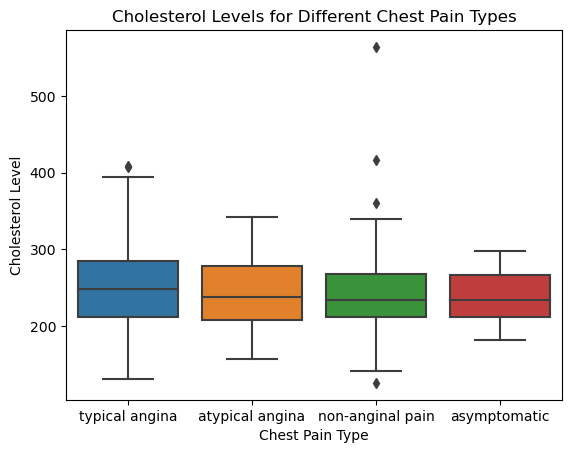

In [33]:
sns.boxplot(x='cp',y='chol',data=df)
plt.title('Cholesterol Levels for Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Cholesterol Level')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.show()

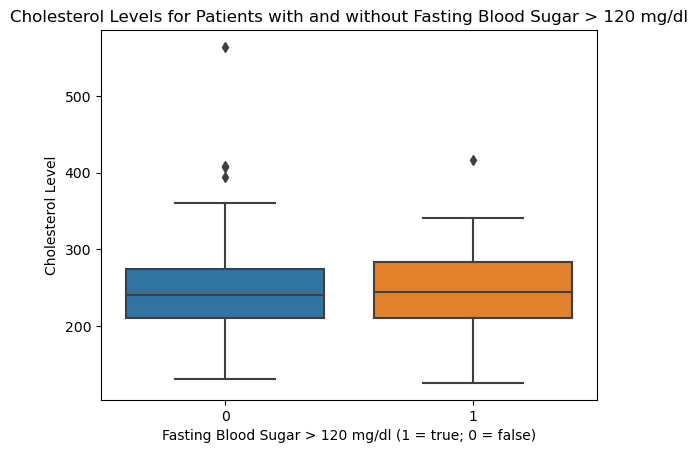

In [34]:
sns.boxplot(x='fbs',y='chol',data=df)
plt.title('Cholesterol Levels for Patients with and without Fasting Blood Sugar > 120 mg/dl')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Cholesterol Level')
plt.show()

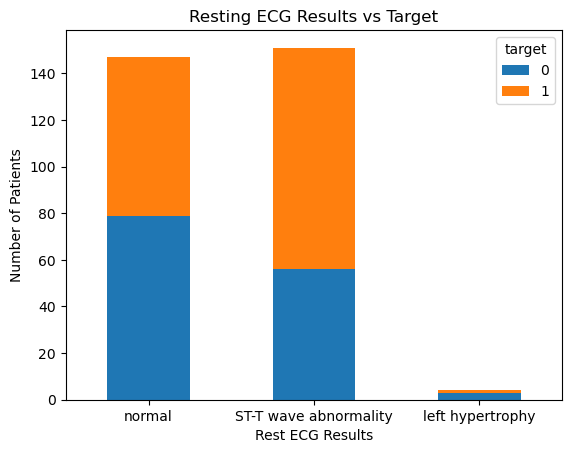

In [38]:
restecgt = df.groupby(['restecg', 'target']).size().unstack().fillna(0)
restecgt.plot(kind='bar',stacked=True)
plt.title('Resting ECG Results vs Target')
plt.xlabel('Rest ECG Results')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0,1,2], labels=['normal', 'ST-T wave abnormality', 'left hypertrophy'], rotation=0)
plt.show()

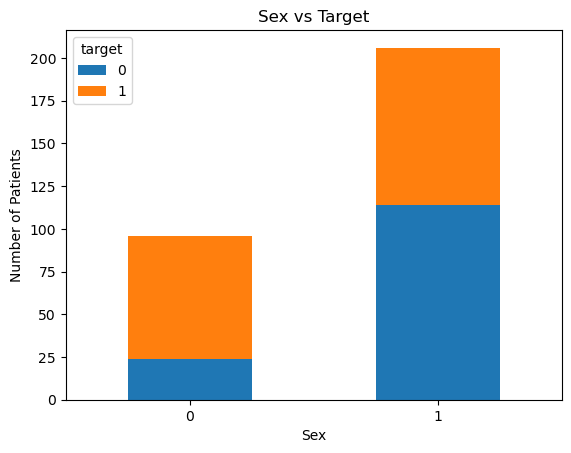

In [39]:
sextar = df.groupby(['sex', 'target']).size().unstack().fillna(0)
sextar.plot(kind='bar',stacked=True)
plt.title('Sex vs Target')
plt.xlabel('Sex')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

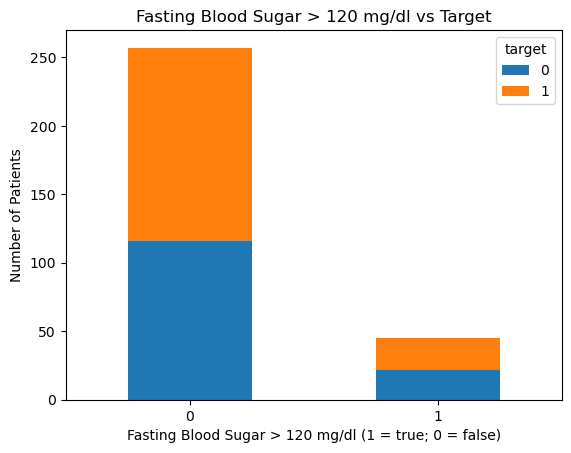

In [40]:
fbs_target = df.groupby(['fbs','target']).size().unstack().fillna(0)
fbs_target.plot(kind='bar',stacked=True)
plt.title('Fasting Blood Sugar > 120 mg/dl vs Target')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

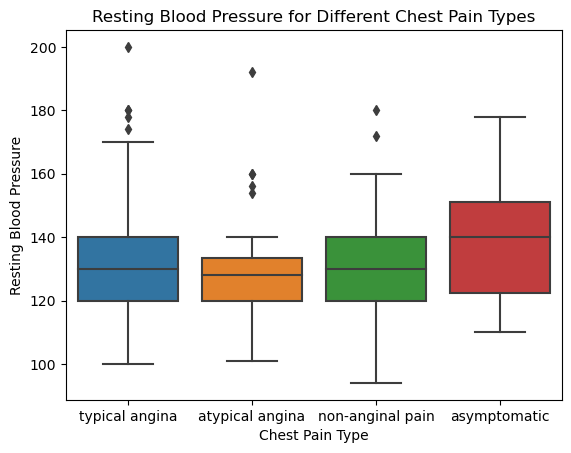

In [41]:
sns.boxplot(x='cp', y='trestbps', data=df)
plt.title('Resting Blood Pressure for Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Resting Blood Pressure')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.show()

Multivariate Analysis

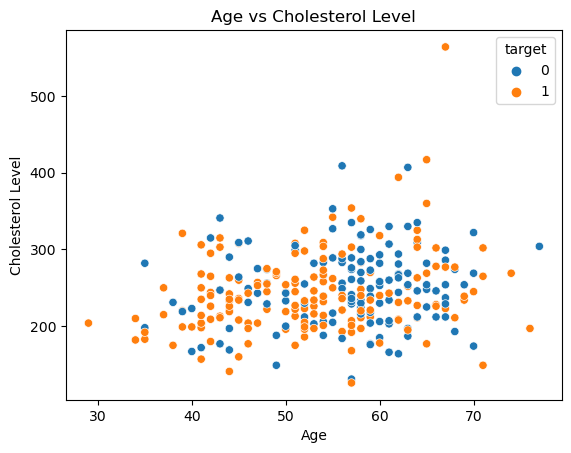

In [43]:
sns.scatterplot(x='age', y='chol',data=df,hue='target')
plt.title('Age vs Cholesterol Level')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.show()

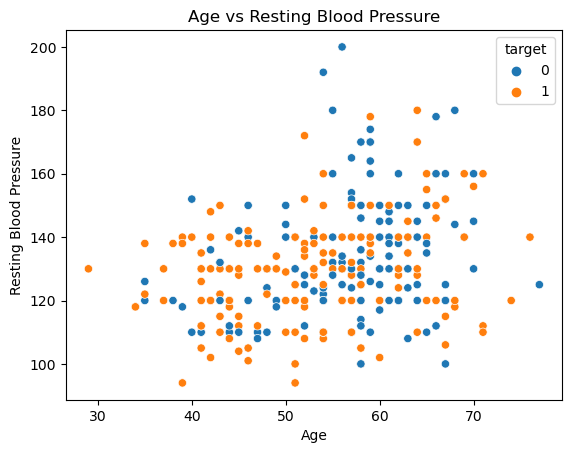

In [44]:
sns.scatterplot(x='age',y='trestbps',hue='target', data=df)
plt.title('Age vs Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()

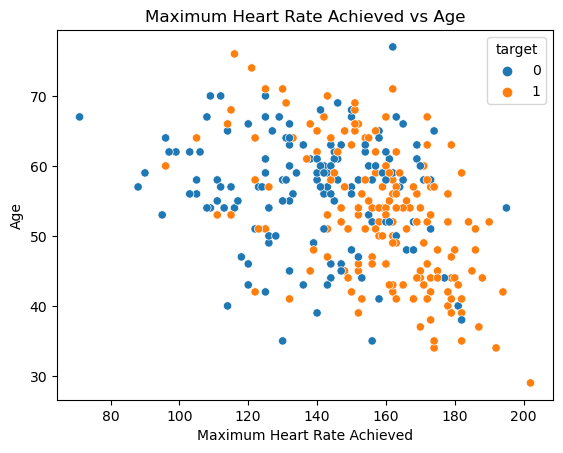

In [45]:
sns.scatterplot(x='thalach', y='age', hue='target', data=df)
plt.title('Maximum Heart Rate Achieved vs Age')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Age')
plt.show()

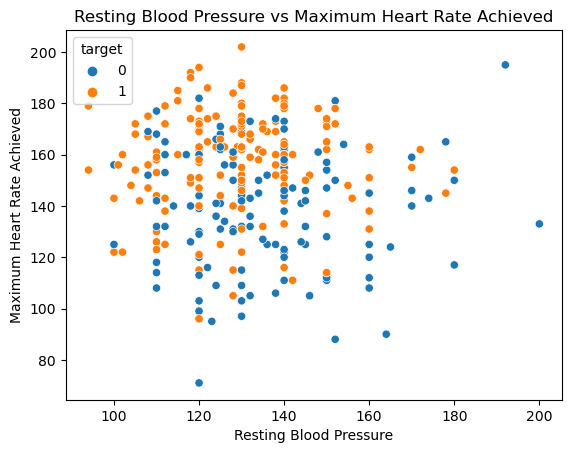

In [47]:
sns.scatterplot(x='trestbps', y='thalach', hue='target', data=df)
plt.title('Resting Blood Pressure vs Maximum Heart Rate Achieved')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

In [51]:
categorical_col = ['sex','cp','restecg','slope','thal']
numerical_col = ['age','trestbps','chol','fbs','thalach','exang','oldpeak','ca','target']
dummy_var = pd.get_dummies(df,columns=categorical_col,drop_first=False)

In [52]:
scaler = StandardScaler()
scaled_num = scaler.fit_transform(df[numerical_col])
scaled_num_df = pd.DataFrame(scaled_num, columns=numerical_col)
dummy_var = dummy_var.drop(numerical_col, axis=1)
processed_df = pd.concat([dummy_var, scaled_num_df], axis=1)

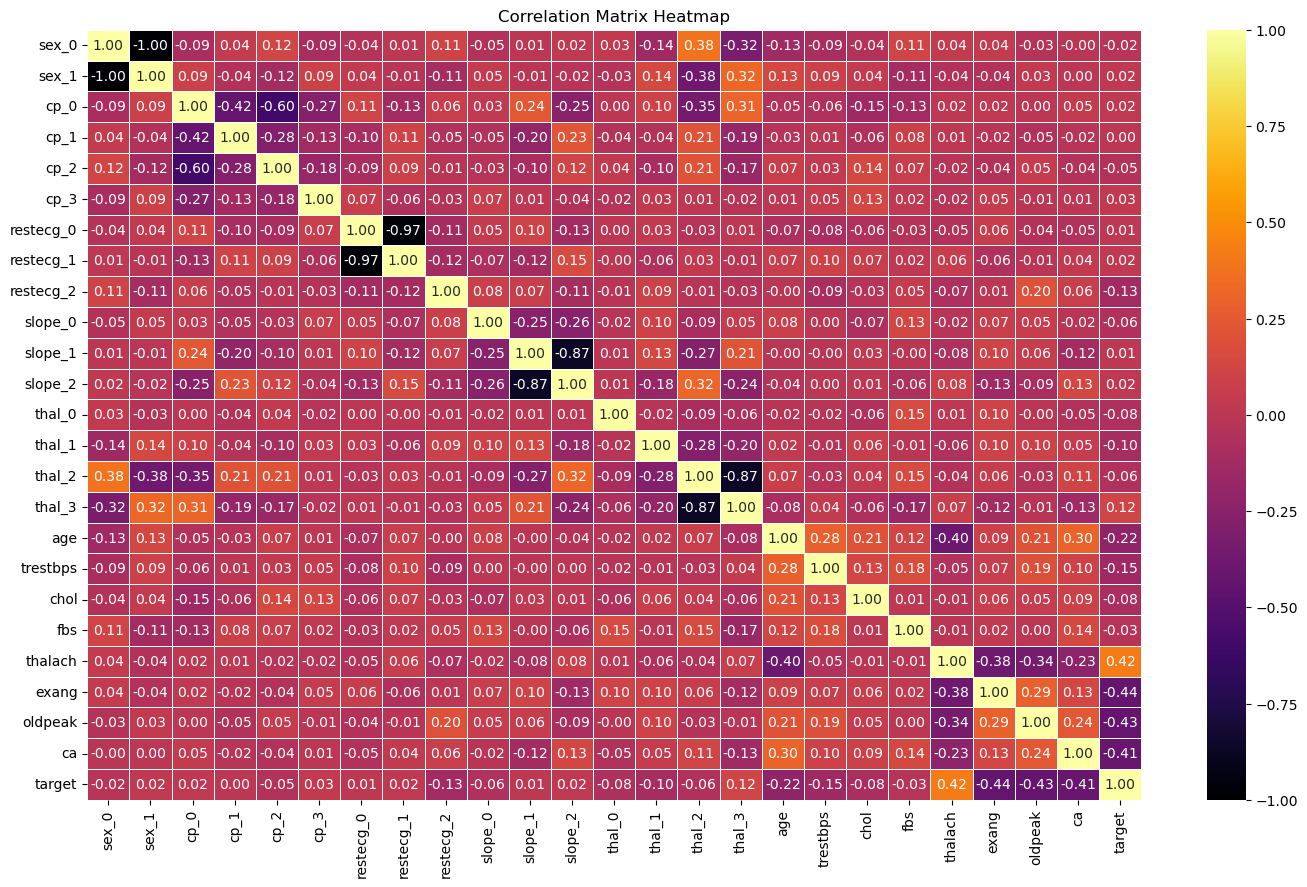

In [57]:
correlation_matrix = processed_df.corr()
plt.figure(figsize=(17, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', linewidths=0.6, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [58]:
corr = processed_df.corr()
targ_corr = corr['target'].drop('target')
targ_corr_sorted = targ_corr.sort_values(ascending=False)

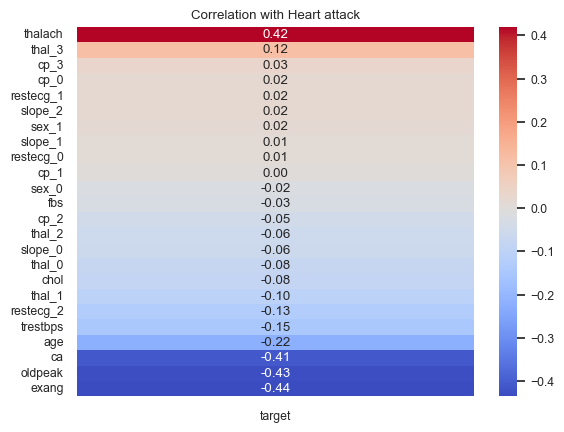

In [72]:
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("dark")
sns.heatmap(targ_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Heart attack')
plt.show()

In [73]:
le = LabelEncoder()
for col in ['sex','cp','restecg','slope','thal']:
    df[col] = le.fit_transform(df[col])
scaler = StandardScaler()
for col in ['age','trestbps','chol','fbs','thalach','exang','oldpeak','ca']:
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))

C:\Users\Shirsadip\AppData\Local\Temp\ipykernel_9884\657449050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\Shirsadip\AppData\Local\Temp\ipykernel_9884\657449050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\Shirsadip\AppData\Local\Temp\ipykernel_9884\657449050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [76]:
from sklearn.decomposition import PCA
x = df.drop('target', axis=1).values  
y = df['target'].values
pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Target'] = y
fig_pca = px.scatter(df_pca, x='Principal Component 1', y='Principal Component 2', color='Target',
                      title='2 Component PCA', template='plotly')
fig_pca.show()

In [77]:
categorical_col = ['sex','cp','restecg','slope','thal']
numerical_col= ['age','trestbps','chol','fbs','thalach','exang','oldpeak','ca']
x = df.drop('target', axis=1)
y = df['target']

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_col),('cat', OneHotEncoder(), categorical_col)])
X_train = preprocessor.fit_transform(x_train)
X_test = preprocessor.transform(x_test)

In [79]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    return train_acc, test_acc, test_pred

In [80]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    return train_acc, test_acc, test_pred

In [81]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [82]:
models = [LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),KNeighborsClassifier(),GaussianNB()]
model_names = ["Logistic Regression", "SVC", "Decision Trees", "Random Forest", "Gradient Boosting", "KNN", "Naive Bayes"]
train_results = []
test_results = []

NameError: name 'itertools' is not defined

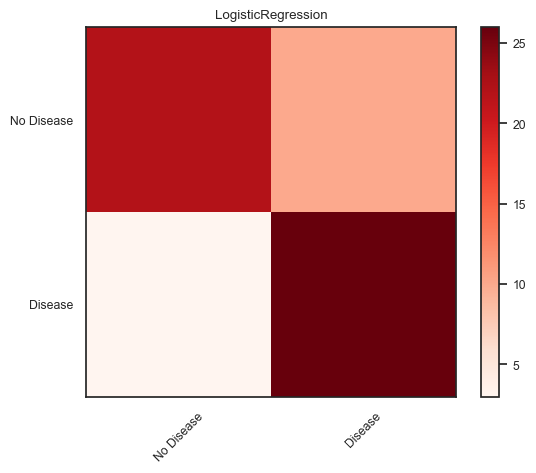

In [84]:
for model in models:
    train_acc, test_acc, y_pred = evaluate_model(model, x_train, y_train, x_test, y_test)
    train_results.append(train_acc)
    test_results.append(test_acc)
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=['No Disease', 'Disease'], title=model.__class__.__name__, cmap=plt.cm.Reds)
    plt.show()

In [86]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10) 
from sklearn.linear_model import LinearRegression 
LR = LinearRegression() 
LR.fit(x_train,y_train) 
# predictingfrom sklearn. 
y_train_predict=LR.predict(x_train) 
y_test_predict=LR.predict(x_test) 

In [87]:
print(round(LR.score(x_train,y_train),3)*100)
print(round(LR.score(x_test,y_test),3)*100)

55.900000000000006
30.599999999999998


In [115]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)
scaler = StandardScaler()
x_test_scaler=scaler.fit_transform(x_test)
y_pred=model.predict(x_test_scaler)
print('accuracy: {}%n'.format(round((accuracy_score(y_test,y_pred)*100),2)))

accuracy: 50.82%n


C:\Users\Shirsadip\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



In [101]:
from sklearn.linear_model import LinearRegression 
LR = LinearRegression() 
LR.fit(x_train,y_train)
LR.score(x_test,y_test)

0.30627632410030636

In [112]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=13)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.819672131147541

In [113]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8032786885245902

In [114]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7868852459016393

In [116]:
from sklearn.metrics import accuracy_score

In [118]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 77.05 %


In [120]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
score_nb = round(accuracy_score(y_pred_nb,y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 78.69 %


In [121]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
y_pred_svm = sv.predict(x_test)
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 78.69 %


In [128]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 83.61 %


In [137]:
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0
for x in range(5000):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(x_train,y_train)
    y_pred_dt = dt.predict(x_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(x_train,y_train)
Y_pred_dt = dt.predict(x_test)
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 72.13 %


In [141]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(x_train,y_train)
    y_pred_rf = rf.predict(x_test)
    current_accuracy = round(accuracy_score(y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        


rf = RandomForestClassifier(random_state=best_x)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 85.25 %


In [157]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algo = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algo)):
    print("The accuracy score achieved using "+algo[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 77.05 %
The accuracy score achieved using Naive Bayes is: 78.69 %
The accuracy score achieved using Support Vector Machine is: 78.69 %
The accuracy score achieved using K-Nearest Neighbors is: 83.61 %
The accuracy score achieved using Decision Tree is: 72.13 %
The accuracy score achieved using Random Forest is: 85.25 %
